In [1]:
### Observations
### Capomulin and Ramicane are the only two drugs that reached timpoints of over 200 on the bar plot. Ranges 150 to 175 were more of the avearge with the other drugs.
### The pie plots indicate that the male/female ratio of the subjects were almost identical with a differnce of 0.8%.
### The weight of the subjects correlates with the volume of the tumors as they both increase.

# import needed modules
import pandas as pd
import os
import scipy.stats as st
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# data set csv file variables
mouseData = ("Mouse_metadata.csv")
studyData = ("Study_results.csv")

In [3]:
# read the data sets
mouseMetadata = pd.read_csv(mouseData)
studyResults = pd.read_csv(studyData)

In [4]:
# merge data sets 
rawData = pd.merge(mouseMetadata, studyResults, on="Mouse ID")

In [5]:
rawData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# locating duplicate mice 
grouped = rawData.copy().groupby(["Mouse ID", "Timepoint"]).agg({"Mouse ID": "count"}).sort_values("Timepoint", ascending=False)
grouped

,,Mouse ID
Mouse ID,Timepoint,
l897,45,1
j913,45,1
g791,45,1
h246,45,1
i177,45,1
...,...,...
t994,0,1
g867,0,1
t724,0,1


In [7]:
# removal of duplicate mice
cleanData = rawData.copy()
cleanData = cleanData.drop(cleanData[cleanData["Mouse ID"] == "g989"].index)
cleanData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# sort by mean, median, standard deviation and scanning electron microscopy in a clean data frame
drugRegimenTumSum_df = pd.DataFrame({
    "Mean": cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    "Median": cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    "Variance": cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation": cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    "SEM": cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
})
drugRegimenTumSum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


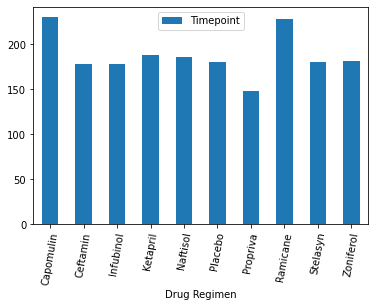

In [16]:
# number of timepoints for all mice tested on pandas bar plot as per instruction
timepoints = cleanData.groupby(["Drug Regimen"]).agg({"Timepoint": "count"})
timepoints.plot(kind="bar", rot=80)
plt.show()

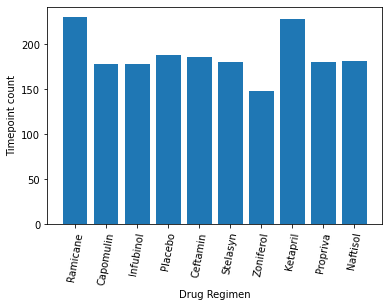

In [21]:
# number of timepoints for all mice tested on matplotlib bar plot as per instruction
x_axis = cleanData["Drug Regimen"].unique()
plt.bar(x_axis, timepoints["Timepoint"])
plt.xlabel("Drug Regimen")
plt.xticks(rotation=80)
plt.ylabel("Timepoint count")
plt.show()

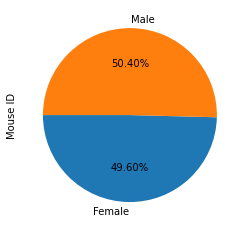

In [30]:
# distrubution of female or male mice on pandas as per instruction
maleFemale = cleanData.groupby("Sex").nunique()["Mouse ID"]
maleFemale.plot(kind="pie", autopct='%1.2f%%', startangle=180)
plt.show()

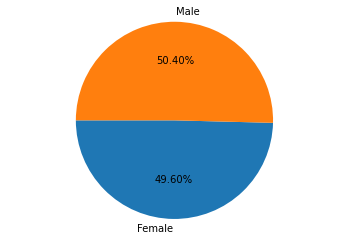

In [32]:
# distrubution of female or male mice on matplotlib as per instruction
labels = ["Female", "Male"]
fig1, ax1 = plt.subplots()
ax1.pie(maleFemale, labels=labels, autopct='%1.2f%%', startangle=180)
ax1.axis('equal')
plt.show()

In [33]:
# calcuate the final tumor value of each mouse across four of the most promising treatments as per instruction
Capomulin = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})
Ramaicane = cleanData.loc[cleanData["Drug Regimen"] == "Ramicane"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})
Infubinol = cleanData.loc[cleanData["Drug Regimen"] == "Infubinol"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})
Ceftamin = cleanData.loc[cleanData["Drug Regimen"] == "Ceftamin"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})

In [37]:
# calculate the quartiles and IQR and determine if there are any potential outliers
drugRegimen = [Capomulin, Ramaicane, Infubinol, Ceftamin]
for x in drugRegimen:
    quartiles = x["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    print(f'Lower outlier = \n{x[x["Tumor Volume (mm3)"] < lowerBound]}')
    print(f'Upper outliers = \n{x[x["Tumor Volume (mm3)"] > upperBound]}')

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Lower outlier = 
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Upper outliers = 
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Lower outlier = 
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Upper outliers = 
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Lower outlier = 
          Tumor Volume (mm3)
Mouse ID                 

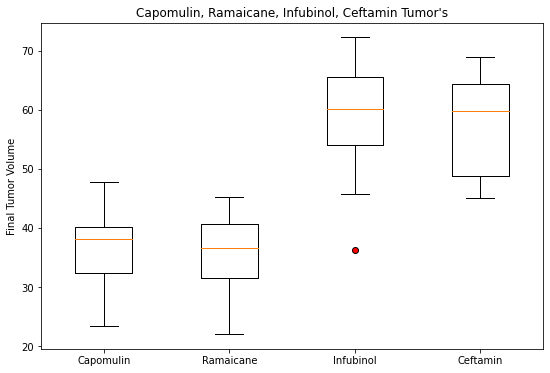

In [53]:
# generate a box and whisker plot of the final tumor volume for all four treatments
fig, ax = plt.subplots(figsize=(9, 6))
ax.boxplot([Capomulin["Tumor Volume (mm3)"],
            Ramaicane["Tumor Volume (mm3)"],
            Infubinol["Tumor Volume (mm3)"],
            Ceftamin["Tumor Volume (mm3)"]],
          flierprops = {'markerfacecolor' : 'red'})
ax.set_xticklabels(["Capomulin", "Ramaicane", "Infubinol", "Ceftamin"])
plt.title("Capomulin, Ramaicane, Infubinol, Ceftamin Tumor's")
plt.ylabel("Final Tumor Volume")
plt.show()

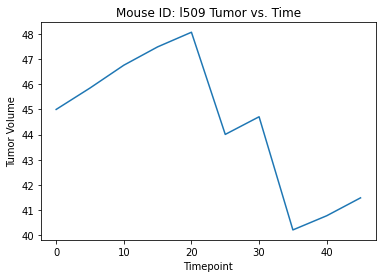

In [45]:
# select mouse treated with Capomulin and generate a line plot of tumor volume vs time point
l509_tum = cleanData.loc[cleanData["Mouse ID"] == "l509"]["Tumor Volume (mm3)"]
l509_time = cleanData.loc[cleanData["Mouse ID"] == "l509"]["Timepoint"]
plt.plot(l509_time, l509_tum)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse ID: l509 Tumor vs. Time")
plt.show()

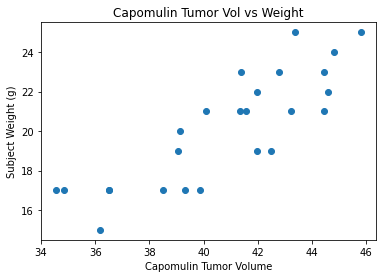

In [51]:
# generate a scatter plot of tumor volume vs weight for the Capomulin treatment
CapomulinAvg = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean"})
CapomulinWeight = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin"]\
    .groupby("Mouse ID").agg({"Weight (g)": "mean"})
plt.scatter(CapomulinAvg, CapomulinWeight)
plt.xlabel("Capomulin Tumor Volume")
plt.ylabel("Subject Weight (g)")
plt.title("Capomulin Tumor Vol vs Weight")
plt.show()

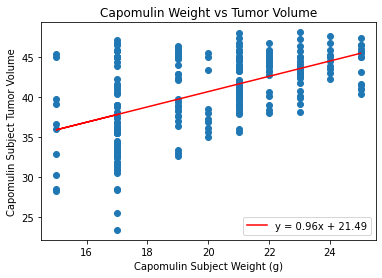

In [50]:
# calculate the correlation of coefficient and linear regression model between mouse weight and average tumor volume for the capomulin treatment
result = st.linregress(
    cleanData[cleanData["Drug Regimen"] == "Capomulin"]["Weight (g)"],
    cleanData[cleanData["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
)
plt.scatter(
    cleanData[cleanData["Drug Regimen"] == "Capomulin"]["Weight (g)"],
    cleanData[cleanData["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
)
formula = result.slope * cleanData[cleanData["Drug Regimen"] == "Capomulin"]["Weight (g)"] + result.intercept
plt.plot(
    cleanData[cleanData["Drug Regimen"] == "Capomulin"]["Weight (g)"],
    formula,
    color='red',
    label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}'
)
plt.xlabel("Capomulin Subject Weight (g)")
plt.ylabel("Capomulin Subject Tumor Volume")
plt.title("Capomulin Weight vs Tumor Volume")
plt.legend(loc='lower right')
plt.show()

In [ ]:
# end data